In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import PIL
import urllib.request
from sklearn.cluster import KMeans

%matplotlib inline

In [19]:
def show_img_compar(img_1, img_2):
    f, ax = plt.subplots(1, 2, figsize=(10, 10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis("off")  # hide the axis
    ax[1].axis("off")
    f.tight_layout()
    plt.show()

In [20]:
import requests
import shutil

for i, link in enumerate(
    [
        "https://pimages.parfumo.de/720/128331_img-8600-moschino-toy_boy_720.jpg",
        "https://pimages.parfumo.de/720/74_img-1003-gucci-gucci_pour_homme_ii_eau_de_toilette_720.jpg",
    ],
    start=1,
):
    r = requests.get(link, stream=True, headers={"User-agent": "Mozilla/5.0"})
    if r.status_code == 200:
        with open(f"img{i}.png", "wb") as f:
            r.raw.decode_content = True
            shutil.copyfileobj(r.raw, f)

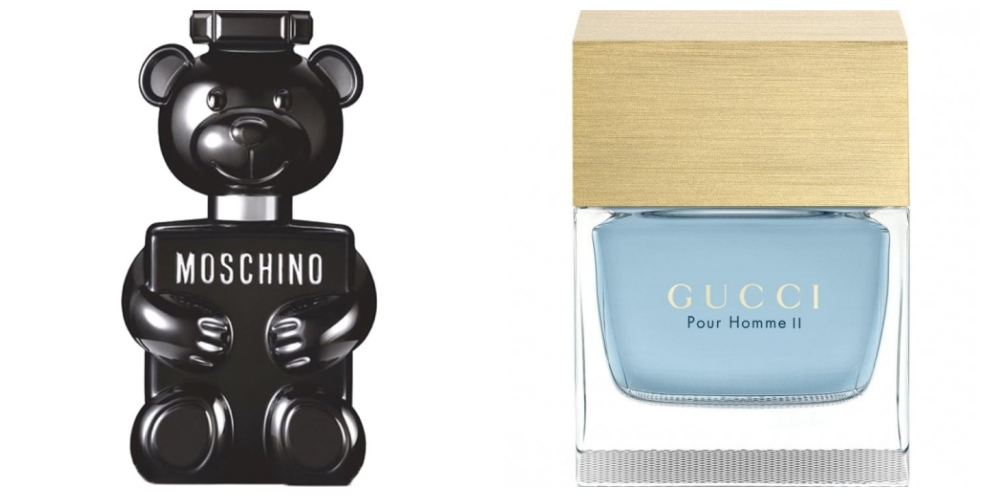

In [21]:
img = cv.imread("img1.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_2 = cv.imread("img2.png")
img_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)

dim = (500, 500)
# resize image
img = cv.resize(img, dim, interpolation=cv.INTER_AREA)
img_2 = cv.resize(img_2, dim, interpolation=cv.INTER_AREA)

show_img_compar(img, img_2)

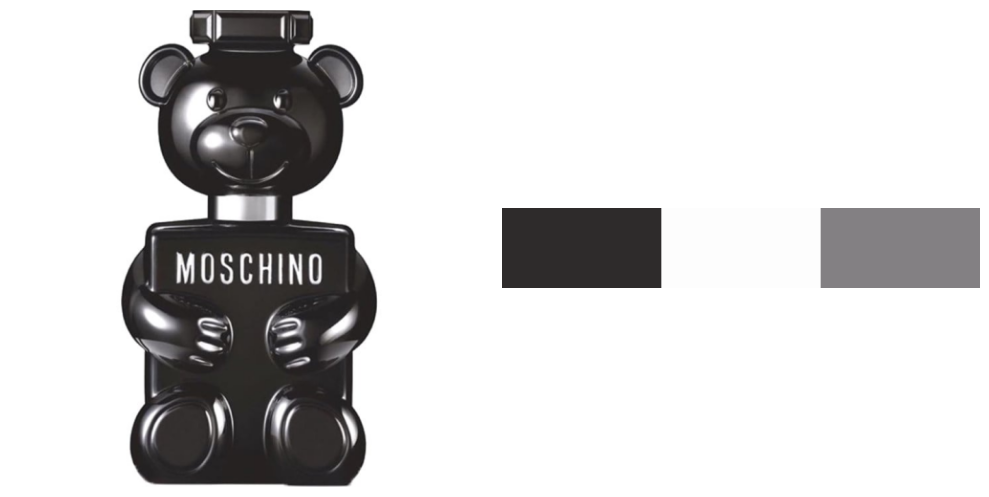

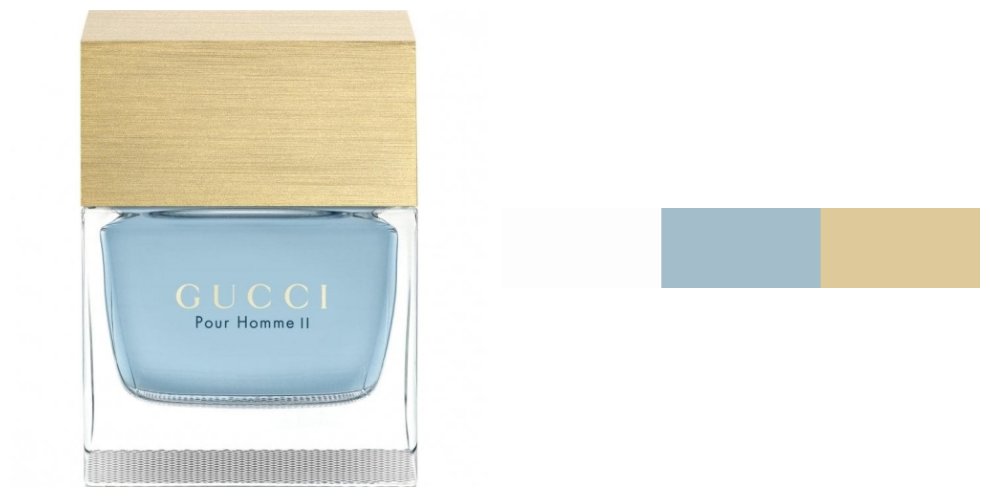

In [23]:
def palette(clusters):
    width = 300
    palette = np.zeros((50, width, 3), np.uint8)
    steps = width / clusters.cluster_centers_.shape[0]
    for idx, centers in enumerate(clusters.cluster_centers_):
        palette[:, int(idx * steps) : (int((idx + 1) * steps)), :] = centers
    return palette


clt = KMeans(n_clusters=3, n_init="auto")

clt_1 = clt.fit(img.reshape(-1, 3))
show_img_compar(img, palette(clt_1))

clt_2 = clt.fit(img_2.reshape(-1, 3))
show_img_compar(img_2, palette(clt_2))

{0: 0.33, 1: 0.61, 2: 0.05}
[[ 46.7570501   43.67053214  43.53286053]
 [254.01788618 253.94720345 254.01569204]
 [132.06265402 129.55462624 132.2011799 ]]


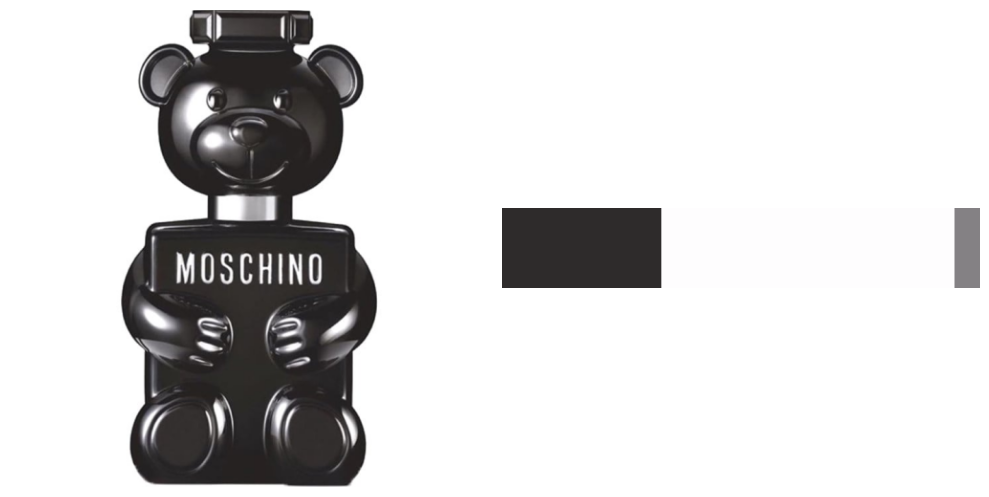

{0: 0.29, 1: 0.42, 2: 0.29}
[[221.72635604 201.41550075 153.26970856]
 [252.75763822 253.08558762 252.66183807]
 [163.83493884 189.25667887 202.53338401]]


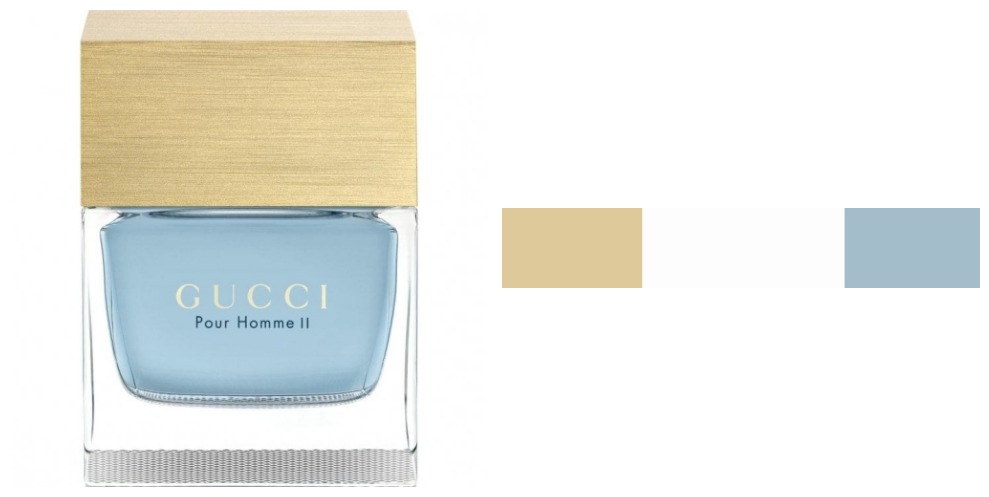

In [26]:
from collections import Counter


def palette_perc(k_cluster):
    width = 300
    palette = np.zeros((50, width, 3), np.uint8)

    n_pixels = len(k_cluster.labels_)
    counter = Counter(k_cluster.labels_)  # count how many pixels per cluster
    perc = {}
    for i in counter:
        perc[i] = np.round(counter[i] / n_pixels, 2)
    perc = dict(sorted(perc.items()))

    # for logging purposes
    print(perc)
    print(k_cluster.cluster_centers_)

    step = 0

    for idx, centers in enumerate(k_cluster.cluster_centers_):
        palette[:, step : int(step + perc[idx] * width + 1), :] = centers
        step += int(perc[idx] * width + 1)

    return palette


clt_1 = clt.fit(img.reshape(-1, 3))
show_img_compar(img, palette_perc(clt_1))

clt_2 = clt.fit(img_2.reshape(-1, 3))
show_img_compar(img_2, palette_perc(clt_2))